In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import math
from sklearn.metrics import mean_squared_error
import yfinance as yf
from yahoofinancials import YahooFinancials



**In this section, we want to build the LSTM model for the Google stock price prediction, first, we collect the data from yahoo for start of year 2014 till the end of year 2018 and create a plot**

In [4]:
start = dt.datetime(2014,1,1)
end = dt.datetime(2018,12,31)
microsoft = yf.download('MSFT', start=start, end=end, progress=False)

<AxesSubplot:xlabel='Date'>

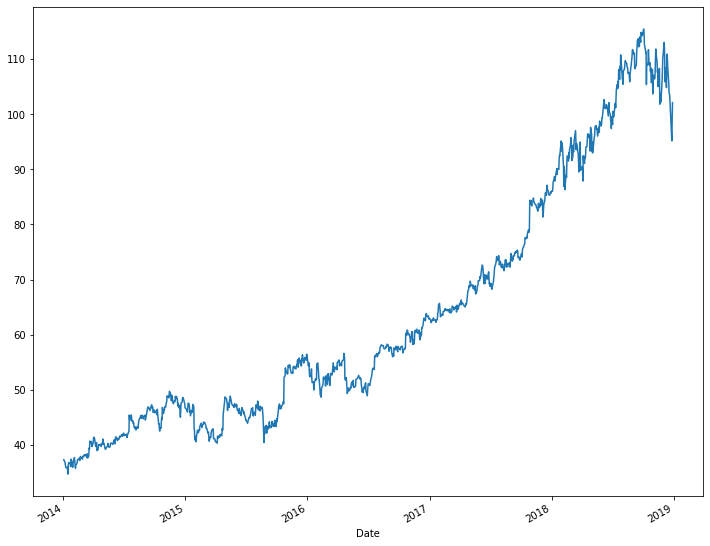

In [5]:
microsoft['Open'].plot(label = 'Microsoft open price', figsize=(12, 10))

**Next we use minmaxscaler to scale our Microsoft data**

In [6]:

microsoft1 = microsoft.reset_index()['Close']

In [7]:
scaler2 = MinMaxScaler()
microsoft1 = scaler2.fit_transform(np.array(microsoft1).reshape(-1, 1))



**We divide our data to test and train set, we use 80% of the data for training and the rest for testing**

In [8]:
microsoft_train_data, microsoft_test_data = microsoft1[0: int(len(microsoft1)*0.8)], microsoft1[(int(len(microsoft)*0.8)):]

In [9]:
microsoft_train_data.shape

(1005, 1)

**We creat a function to divide our train data and test data into X_train, y_train and X_test, y_train respectivelly**

In [10]:
timestep=1

def create_data(dataset, timestep):
    dataX = []
    dataY=[]
    for i in range (len(dataset)-timestep-1):
        dataX.append(dataset[i:(i+timestep), 0])
        dataY.append(dataset[i+timestep, 0])
    return np.array(dataX),  np.array(dataY)

In [11]:
microsoft_X_train, microsoft_y_train = create_data(microsoft_train_data, 100)
microsoft_X_test, microsoft_y_test = create_data(microsoft_test_data, 100)

**For the LSTM model we need our data to be 3 dimensional, so we reshape our X_train and X_test data by adding 1 to the third dimension**

In [12]:
microsoft_X_train = microsoft_X_train.reshape(microsoft_X_train.shape[0], microsoft_X_train.shape[1], 1)
microsoft_X_test = microsoft_X_test.reshape(microsoft_X_test.shape[0], microsoft_X_test.shape[1], 1)

In [13]:
microsoft_X_test.shape

(151, 100, 1)

**Next we create our LSTM model**

In [14]:
mic_model = Sequential()
mic_model.add(LSTM(50, return_sequences = True, input_shape=(100,1)))
mic_model.add(LSTM(50, return_sequences=True))
mic_model.add(LSTM(50))
mic_model.add(Dense(1))
mic_model.compile(loss='mean_squared_error', optimizer='adam', metrics = [tf.keras.metrics.MeanSquaredError()])



In [15]:
mic_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


**We fit our data to our model with epochs=100, batch_size 64**

In [16]:

history = mic_model.fit(microsoft_X_train, microsoft_y_train, validation_data=(microsoft_X_test, microsoft_y_test),  epochs=100, batch_size=64, verbose=1)

Epoch 1/100
15/15 [==============================] - 7s 201ms/step - loss: 0.0367 - mean_squared_error: 0.0367 - val_loss: 0.1155 - val_mean_squared_error: 0.1155
Epoch 2/100
15/15 [==============================] - 1s 84ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0214 - val_mean_squared_error: 0.0214
Epoch 3/100
15/15 [==============================] - 1s 84ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 4/100
15/15 [==============================] - 1s 92ms/step - loss: 6.9951e-04 - mean_squared_error: 6.9951e-04 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 5/100
15/15 [==============================] - 1s 83ms/step - loss: 6.2487e-04 - mean_squared_error: 6.2487e-04 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 6/100
15/15 [==============================] - 1s 83ms/step - loss: 5.2834e-04 - mean_squared_error: 5.2834e-04 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epo

15/15 [==============================] - 1s 83ms/step - loss: 3.4693e-04 - mean_squared_error: 3.4693e-04 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 50/100
15/15 [==============================] - 1s 84ms/step - loss: 3.6905e-04 - mean_squared_error: 3.6905e-04 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 51/100
15/15 [==============================] - 1s 83ms/step - loss: 3.2008e-04 - mean_squared_error: 3.2008e-04 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 52/100
15/15 [==============================] - 1s 83ms/step - loss: 3.5206e-04 - mean_squared_error: 3.5206e-04 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 53/100
15/15 [==============================] - 1s 84ms/step - loss: 3.7346e-04 - mean_squared_error: 3.7346e-04 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 54/100
15/15 [==============================] - 1s 83ms/step - loss: 3.0898e-04 - mean_squared_error: 3.0898e-04 - val_loss: 0.0016 - val_mean_squared_e

15/15 [==============================] - 2s 103ms/step - loss: 2.1309e-04 - mean_squared_error: 2.1309e-04 - val_loss: 8.0223e-04 - val_mean_squared_error: 8.0223e-04
Epoch 97/100
15/15 [==============================] - 2s 127ms/step - loss: 1.8153e-04 - mean_squared_error: 1.8153e-04 - val_loss: 8.1093e-04 - val_mean_squared_error: 8.1093e-04
Epoch 98/100
15/15 [==============================] - 2s 112ms/step - loss: 2.1369e-04 - mean_squared_error: 2.1369e-04 - val_loss: 7.8230e-04 - val_mean_squared_error: 7.8230e-04
Epoch 99/100
15/15 [==============================] - 1s 94ms/step - loss: 1.8748e-04 - mean_squared_error: 1.8748e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 100/100
15/15 [==============================] - 1s 87ms/step - loss: 1.9498e-04 - mean_squared_error: 1.9498e-04 - val_loss: 7.7760e-04 - val_mean_squared_error: 7.7760e-04


**we can see from our model that the loss is decreassing**


**Next we predict our train set and test set and user inverse_scalaer to convert the data back to normal**

In [17]:
microsoft_train_pred = mic_model.predict(microsoft_X_train)
microsoft_test_pred = mic_model.predict(microsoft_X_test)

In [18]:
microsoft_train_pred = scaler2.inverse_transform(microsoft_train_pred)
microsoft_test_pred = scaler2.inverse_transform(microsoft_test_pred)
microsoft_train_data = scaler2.inverse_transform(microsoft_train_data)
microsoft_test_data = scaler2.inverse_transform(microsoft_test_data)

**We use the RMSE (standard deviation of residuals) both for training and testing data, to compute the accuracy of our model, relative to our dataset, the RMSE gave us a good score!**

In [19]:
math.sqrt(mean_squared_error(microsoft_y_test, microsoft_test_pred))

106.0513205171968

In [20]:
math.sqrt(mean_squared_error(microsoft_y_train, microsoft_train_pred))

56.844798486586065

**We use our predicted test data and predicted train data to plot our prediction. The blue line shows the actual prices, the orange shows our train data and the green line shows our test data. From the plot, we can see that our model did a good job predicting the stock price!**

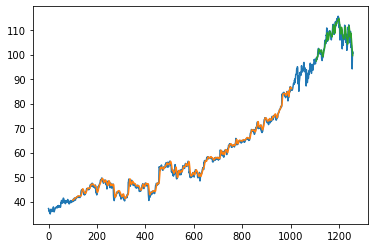

In [21]:
timestep3=100
microsoft_train_plot = np.empty_like(microsoft1)
microsoft_train_plot[:, :] = np.nan
microsoft_train_plot[timestep3: len(microsoft_train_pred)+timestep3, :] = microsoft_train_pred
microsoft_test_plot = np.empty_like(microsoft1)
microsoft_test_plot[:, :] = np.nan
microsoft_test_plot[len(microsoft_train_pred)+(timestep3*2)+1:len(microsoft1)-1, :] = microsoft_test_pred
plt.plot(scaler2.inverse_transform(microsoft1))
plt.plot(microsoft_train_plot)
plt.plot(microsoft_test_plot)
plt.show()

**Next, we create a dataframe to show the actual prices versus our prediction for the last 150 days, next to each other. the test prediction was converted to list, and the dataframe was created**

In [22]:
microsoft_test_pred.shape

(151, 1)

In [23]:
microsoft_test_pred= microsoft_test_pred.tolist()


In [25]:
mc = microsoft['Close'][-151:] 


In [26]:
def extractDigits(lst):
    return [[el] for el in lst]
mc1 = extractDigits(mc)


In [27]:
df_micro = pd.DataFrame (mc1, columns=['actual'])


In [32]:
df_mic = pd.DataFrame (microsoft_test_pred, columns=['Prediction'])
df_mic['Actual'] = mc1


In [33]:

df_mic['Actual'] =  df_mic['Actual'].str.get(0)

In [34]:
df_mic.head(10)

,Prediction,Actual
0,97.374687,98.309998
1,98.027412,98.360001
2,98.614212,98.010002
3,98.962837,98.949997
4,98.993401,98.839996
5,99.040825,100.790001
6,99.126289,101.669998
7,99.640816,102.190002
8,100.510803,102.489998
9,101.443924,100.879997


**The result shows that the our prediction did a great job predicting the stock prices, for the most part our precition was very close to the actual price!**